<a href="https://colab.research.google.com/github/Zeenat85/Colab-Notebooks/blob/main/Cartoonifier_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cartoonifier image  with OpenCV in Python

NAME-ZEENAT AMAAN

REG.NO-18BCE10307

In [ ]:
# Necessary imports
import cv2
import numpy as np
#  Importing function cv2_imshow necessary for programming in Google Colab
from google.colab.patches import cv2_imshow

Original Image

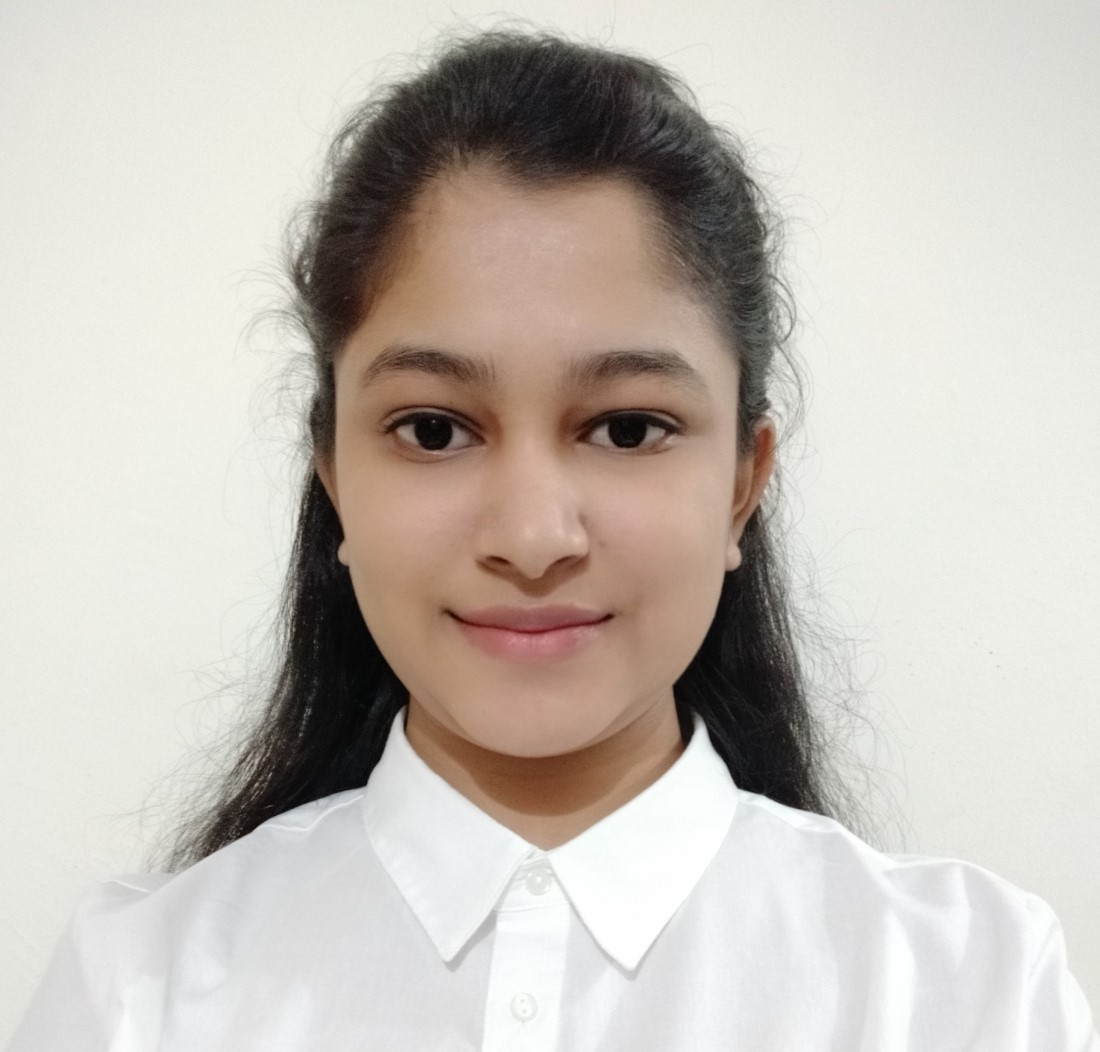

In [ ]:
img = cv2.imread("/content/Photo2.jpg")
cv2_imshow(img)

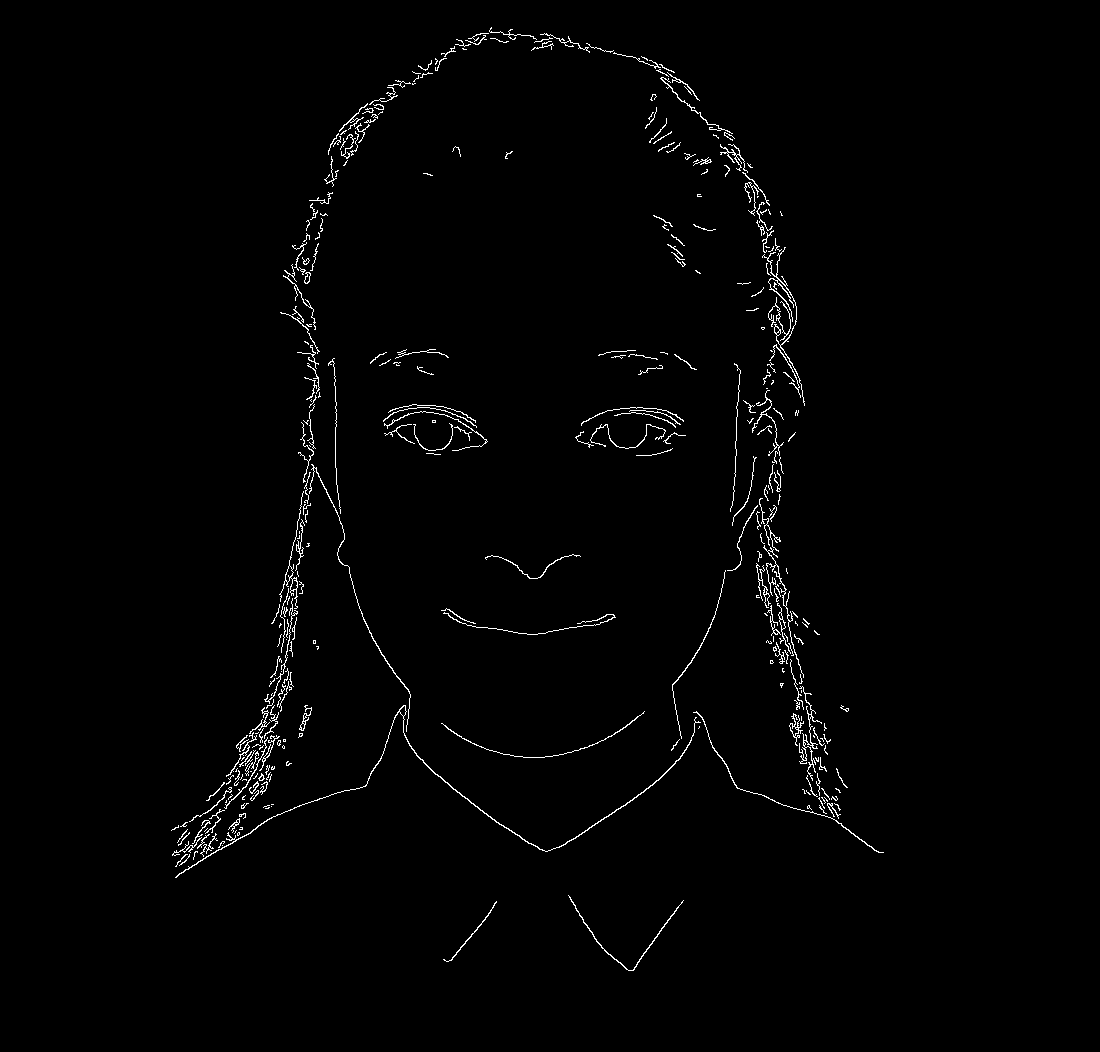

In [ ]:
edges = cv2.Canny(img, 100, 200)
cv2_imshow(edges)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)

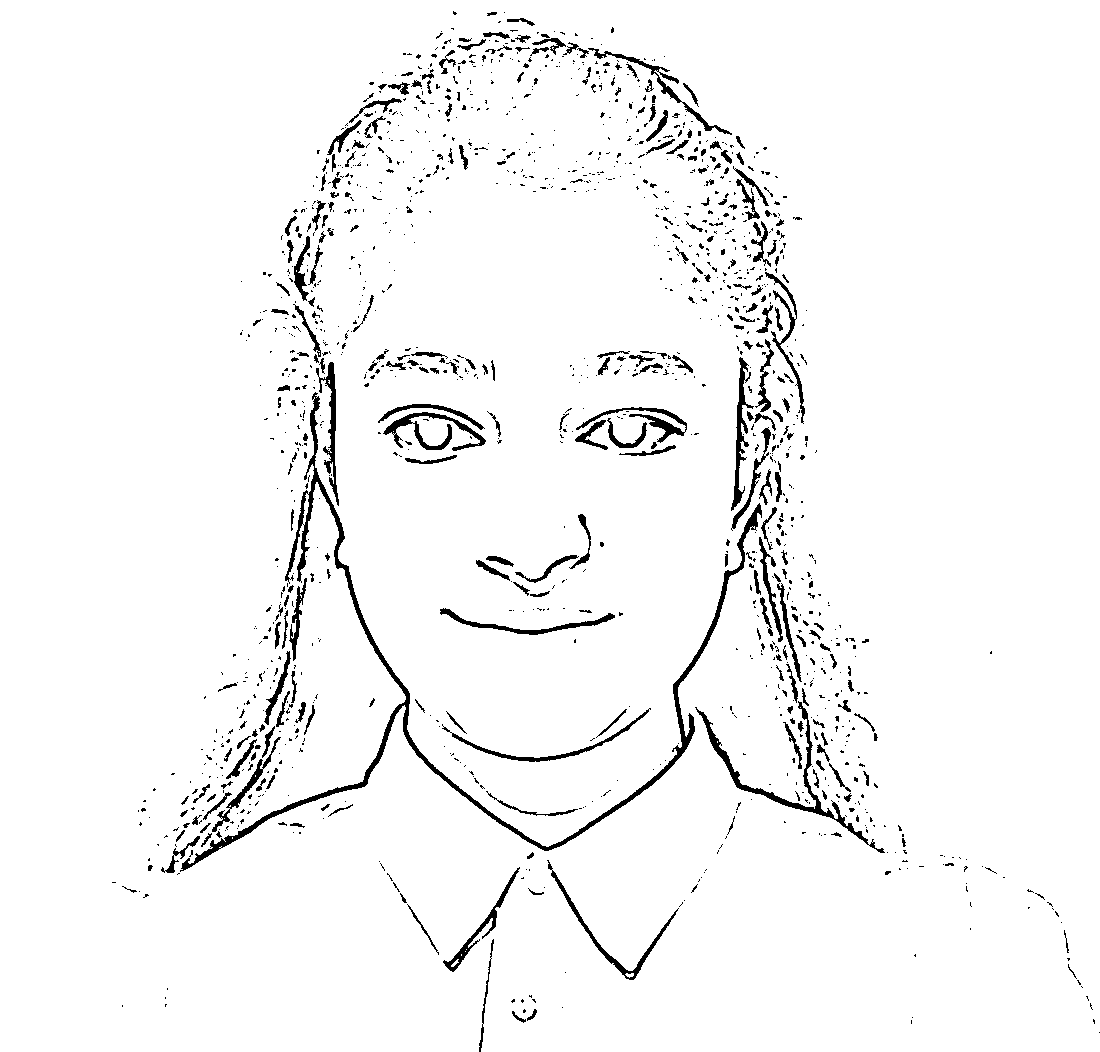

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
cv2_imshow(edges)

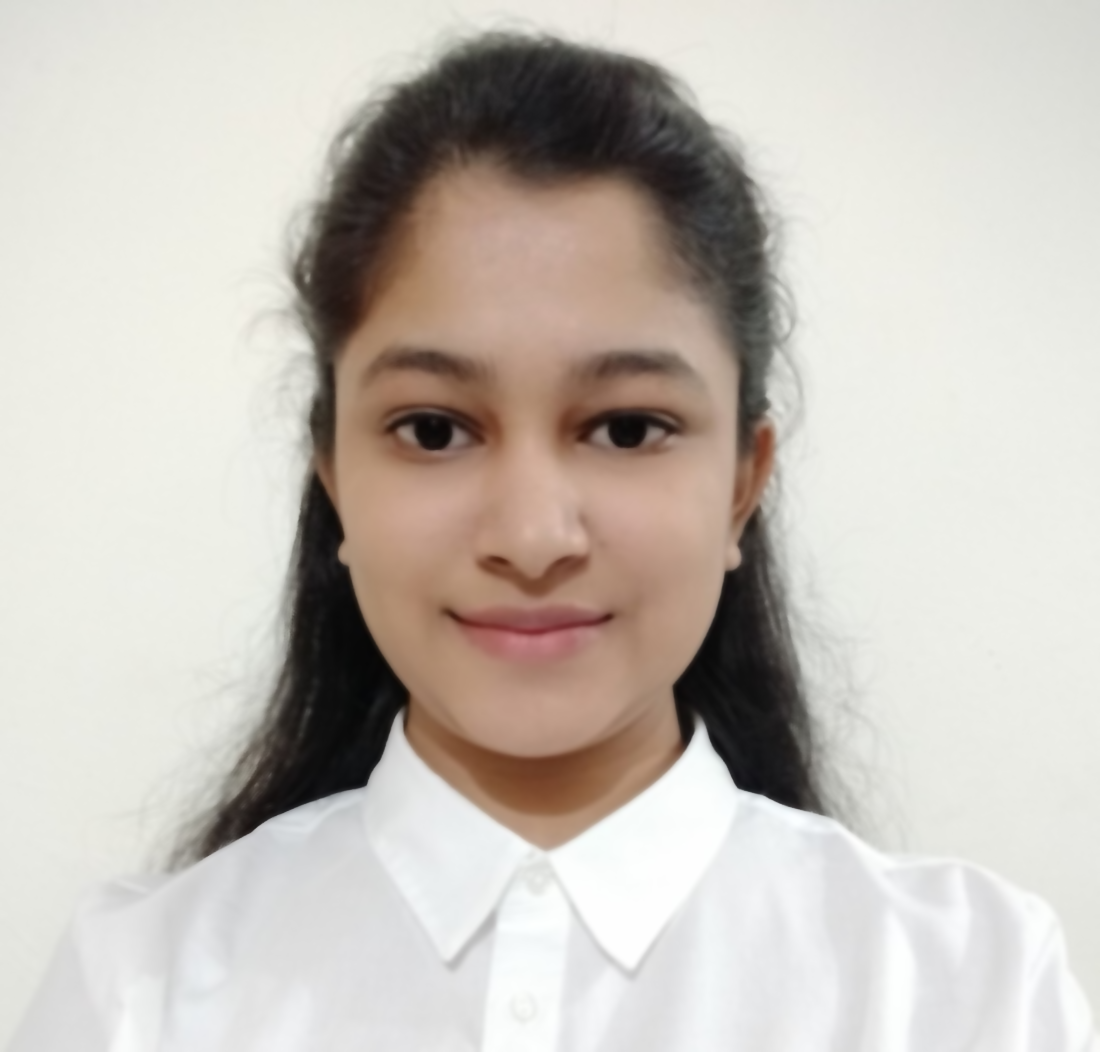

In [ ]:
color = cv2.bilateralFilter(img, d=9, sigmaColor=200,sigmaSpace=200)
cv2_imshow(color)

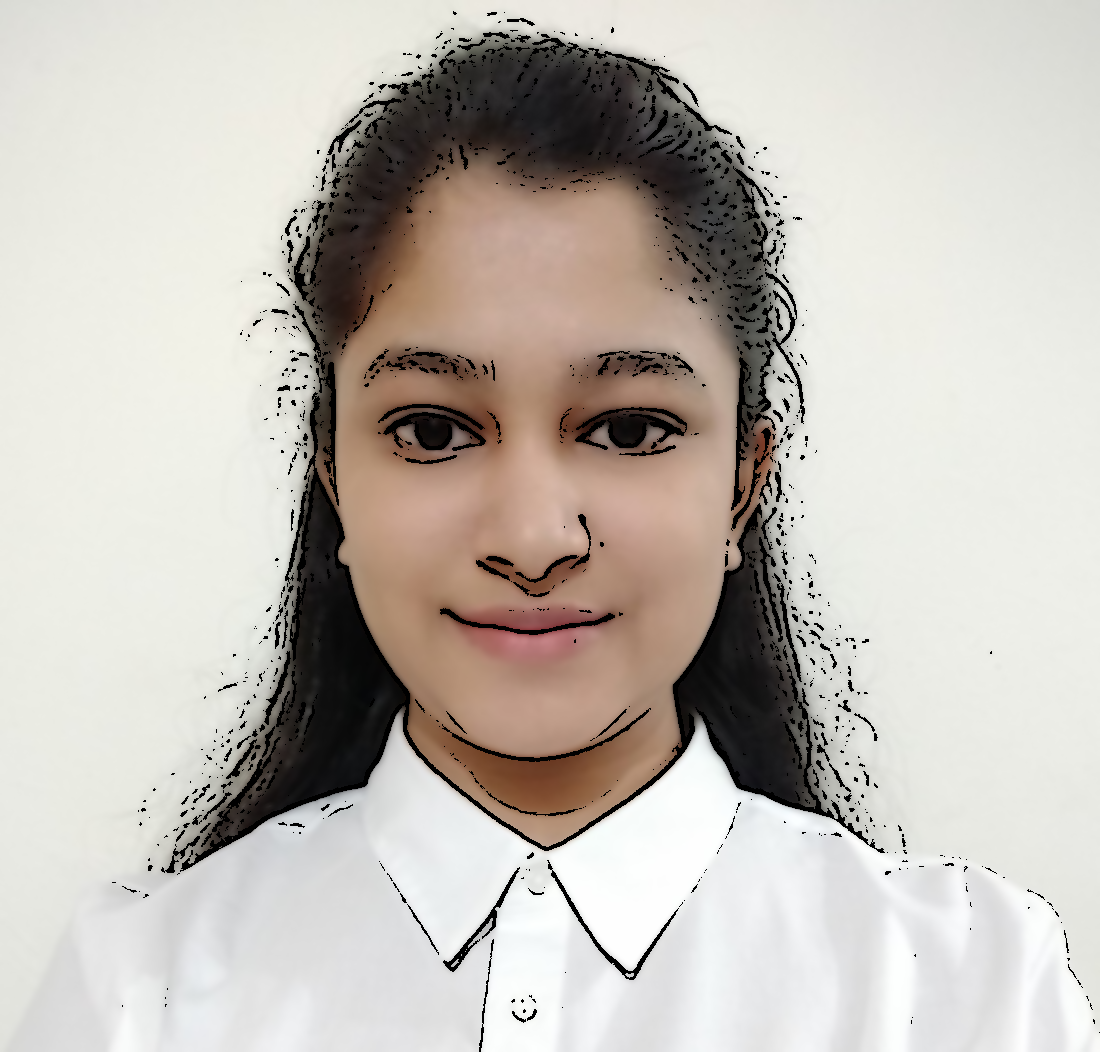

In [ ]:
cartoon = cv2.bitwise_and(color, color, mask=edges)
cv2_imshow(cartoon)

In [ ]:
def color_quantization(img, k):
# Defining input data for clustering
  data = np.float32(img).reshape((-1, 3))
# Defining criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
# Applying cv2.kmeans function
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

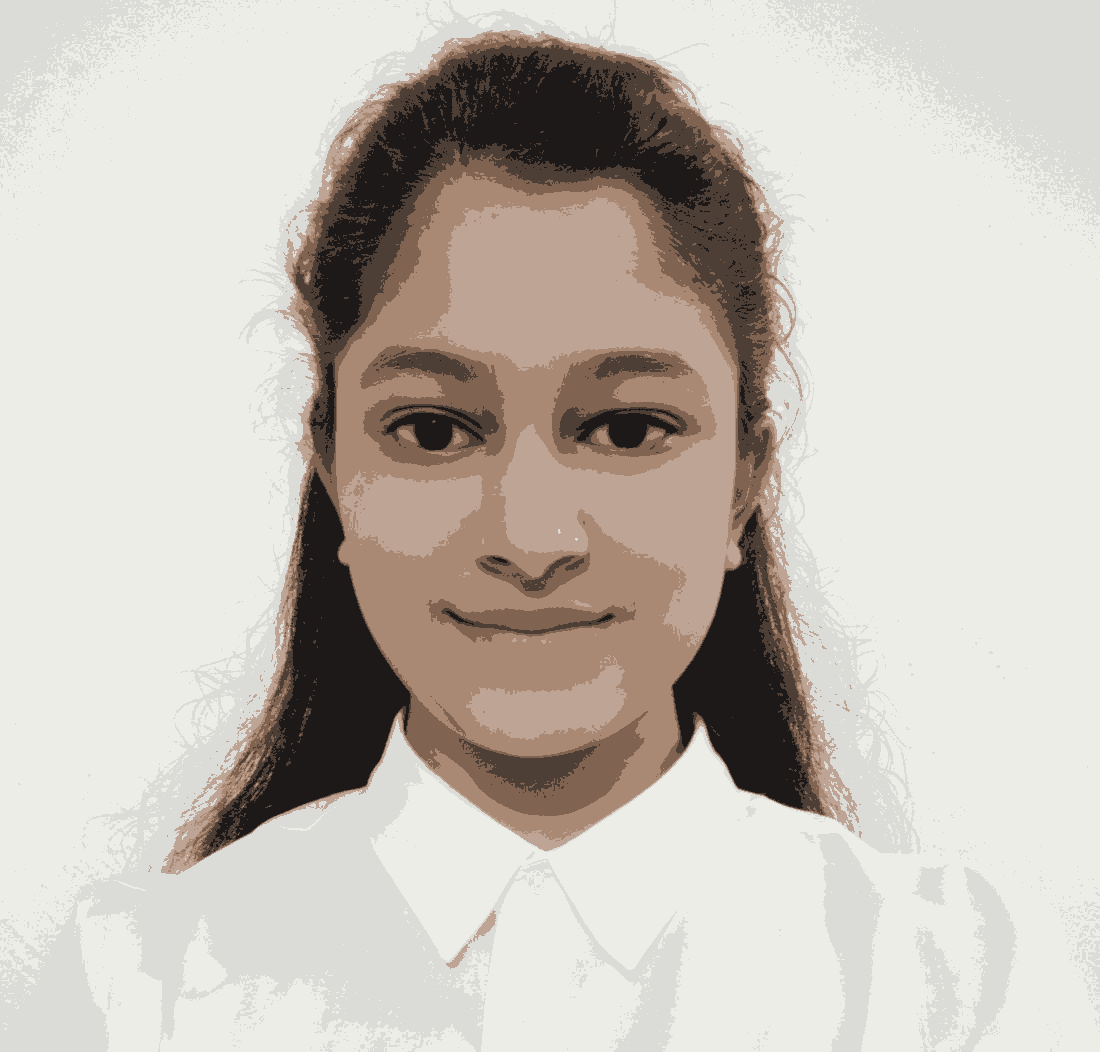

In [ ]:
img_1 = color_quantization(img, 7)
cv2_imshow(img_1)

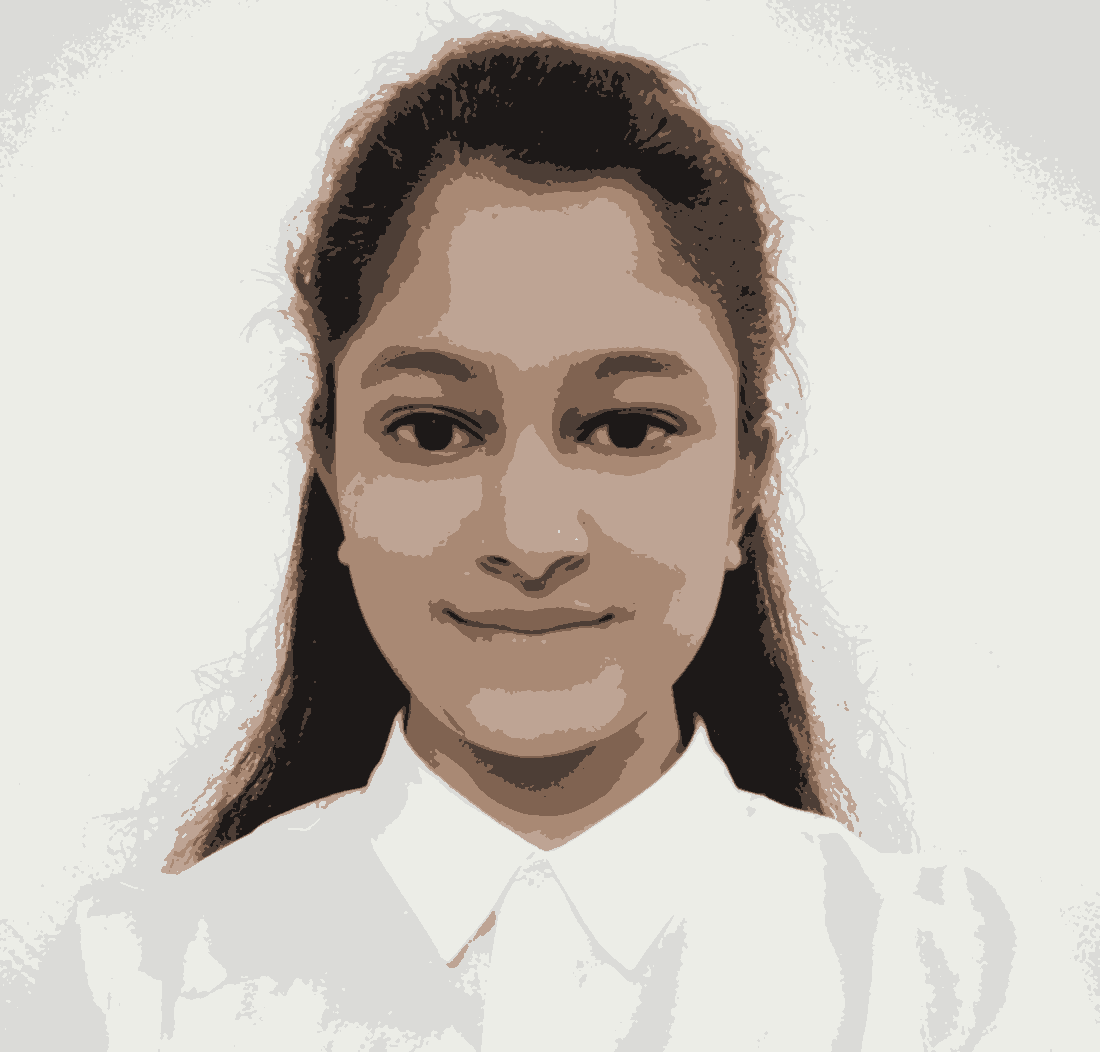

In [ ]:
blurred = cv2.medianBlur(img_1, 3)
cv2_imshow(blurred)

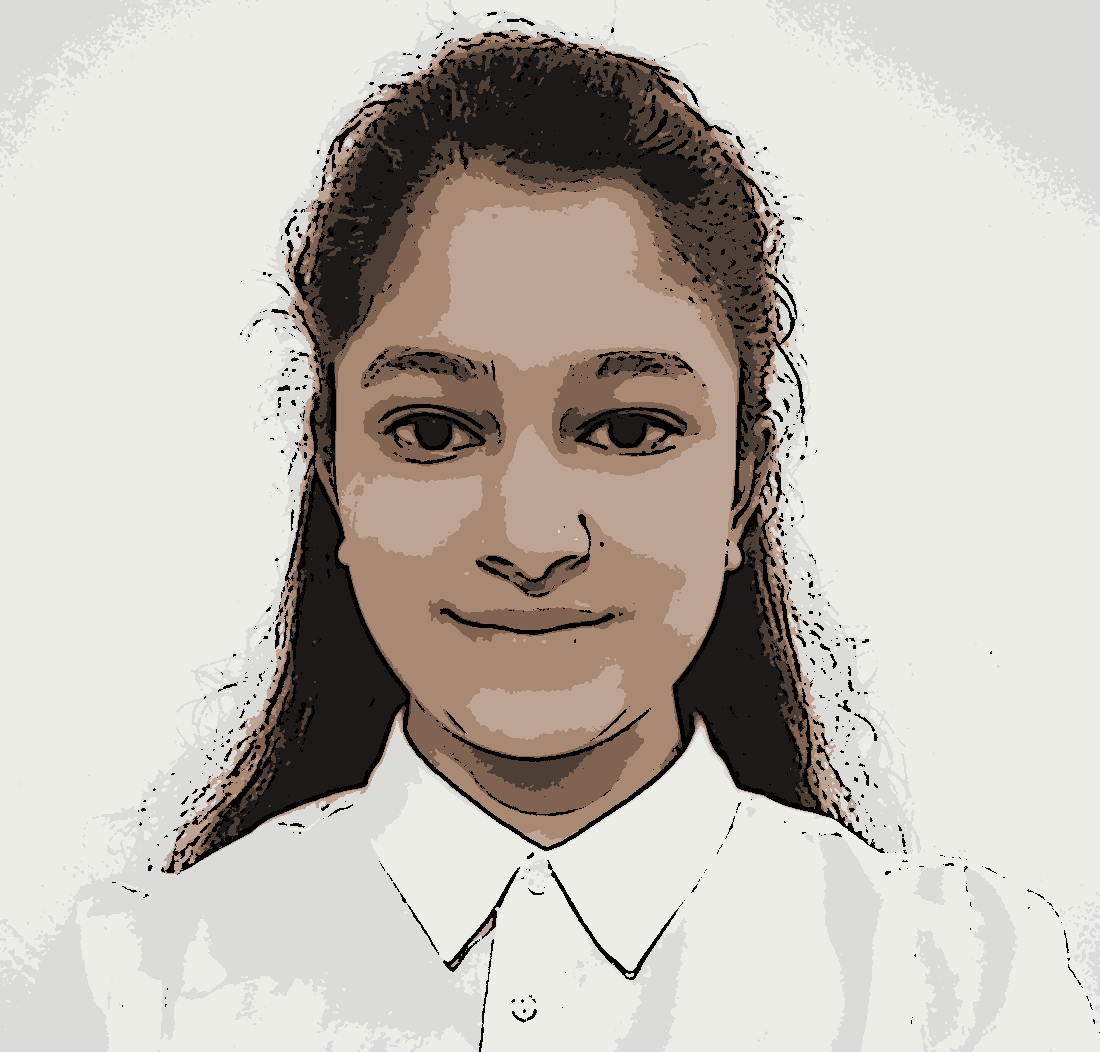

In [ ]:
cartoon_1 = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon_1)